In [1]:
import pandas as pd

# Load dataset (adjust filename if needed)
df = pd.read_csv("student-mat.csv", sep=";")

# Drop G1 and G2 to avoid using them as predictors
df = df.drop(columns=["G1", "G2"])

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10


In [2]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Before encoding: print them
print("Categorical Columns to Encode:\n")
for col in cat_cols:
    print("-", col)

# Perform One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Show mapping of old → new columns
print("Mapping of encoded columns:\n")

for col in cat_cols:
    new_cols = [c for c in df_encoded.columns if c.startswith(col + "_")]
    print(f"{col} → {new_cols}")


Categorical Columns to Encode:

- school
- sex
- address
- famsize
- Pstatus
- Mjob
- Fjob
- reason
- guardian
- schoolsup
- famsup
- paid
- activities
- nursery
- higher
- internet
- romantic
Mapping of encoded columns:

school → ['school_MS']
sex → ['sex_M']
address → ['address_U']
famsize → ['famsize_LE3']
Pstatus → ['Pstatus_T']
Mjob → ['Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher']
Fjob → ['Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher']
reason → ['reason_home', 'reason_other', 'reason_reputation']
guardian → ['guardian_mother', 'guardian_other']
schoolsup → ['schoolsup_yes']
famsup → ['famsup_yes']
paid → ['paid_yes']
activities → ['activities_yes']
nursery → ['nursery_yes']
higher → ['higher_yes']
internet → ['internet_yes']
romantic → ['romantic_yes']


In [3]:
from sklearn.model_selection import train_test_split

# Target variable
y = df_encoded["G3"]

# Features (everything except G3)
X = df_encoded.drop(columns=["G3"])

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


Scale Feature

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
print("\nScaled Feature Snippet:")
scaled_df.head(10)


Scaled Feature Snippet:


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,-0.560008,0.244103,0.459335,2.361465,-0.086757,-0.462007,1.215287,-0.249043,-1.016419,-0.557247,...,0.672779,-0.308607,2.360387,0.795698,-0.923227,1.014599,0.510171,0.256197,-2.327790,-0.724474
1,-0.560008,0.244103,-0.479750,0.883541,-1.283999,0.894524,0.050637,1.714836,-1.016419,-0.557247,...,0.672779,-0.308607,-0.423659,0.795698,-0.923227,1.014599,-1.960129,-3.903241,-2.327790,-0.724474
2,-1.336703,-0.691625,1.398420,-0.594382,1.110485,-0.462007,0.050637,-0.249043,-1.016419,-0.557247,...,0.672779,-0.308607,2.360387,0.795698,1.083157,1.014599,0.510171,0.256197,0.429592,-0.724474
3,-1.336703,0.244103,1.398420,-0.594382,-0.086757,-0.462007,1.215287,-0.249043,-1.016419,-0.557247,...,0.672779,-0.308607,2.360387,-1.256757,-0.923227,1.014599,0.510171,0.256197,0.429592,1.380313
4,0.993381,1.179830,0.459335,-0.594382,1.110485,-0.462007,1.215287,-0.249043,-1.016419,-0.557247,...,0.672779,-0.308607,-0.423659,-1.256757,-0.923227,-0.985611,0.510171,0.256197,0.429592,1.380313
5,-0.560008,-0.691625,-0.479750,0.883541,-0.086757,-0.462007,-1.114013,0.732897,0.759098,-0.557247,...,0.672779,-0.308607,-0.423659,-1.256757,1.083157,1.014599,-1.960129,0.256197,0.429592,-0.724474
6,0.216687,-0.691625,-0.479750,0.883541,-0.086757,-0.462007,0.050637,0.732897,0.759098,0.565382,...,0.672779,-0.308607,2.360387,0.795698,1.083157,-0.985611,0.510171,0.256197,0.429592,1.380313
7,0.216687,-0.691625,0.459335,0.883541,-1.283999,-0.462007,1.215287,-1.230982,-1.016419,-0.557247,...,-1.486372,-0.308607,-0.423659,-1.256757,-0.923227,-0.985611,0.510171,0.256197,0.429592,-0.724474
8,0.993381,-0.691625,-0.479750,-0.594382,-0.086757,0.894524,1.215287,1.714836,0.759098,1.688010,...,-1.486372,-0.308607,-0.423659,-1.256757,-0.923227,-0.985611,0.510171,-3.903241,0.429592,-0.724474
9,1.770076,0.244103,-0.479750,-0.594382,-1.283999,3.607587,0.050637,1.714836,0.759098,-0.557247,...,0.672779,-0.308607,-0.423659,0.795698,-0.923227,-0.985611,0.510171,-3.903241,0.429592,1.380313


Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\nLinear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
MAE: 3.288139868075898
RMSE: 4.217846027981649
R2 Score: 0.19069357680255772


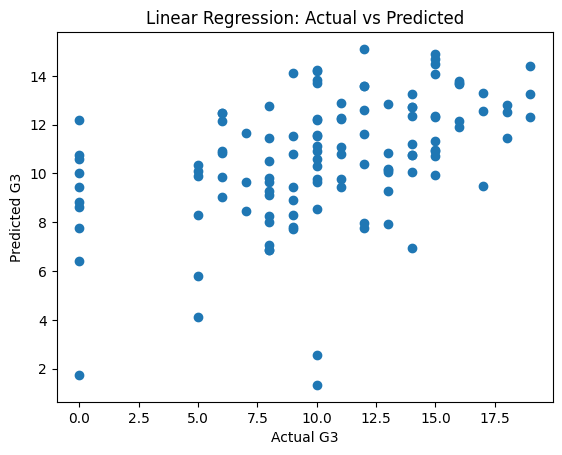

In [6]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

Decision Tree

In [7]:
from sklearn.tree import DecisionTreeRegressor

# Train tree 
dt_full = DecisionTreeRegressor(random_state=42)
dt_full.fit(X_train_scaled, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [8]:
print("True Depth of Tree:", dt_full.get_depth())
print("Number of Leaves:", dt_full.get_n_leaves())

True Depth of Tree: 18
Number of Leaves: 194


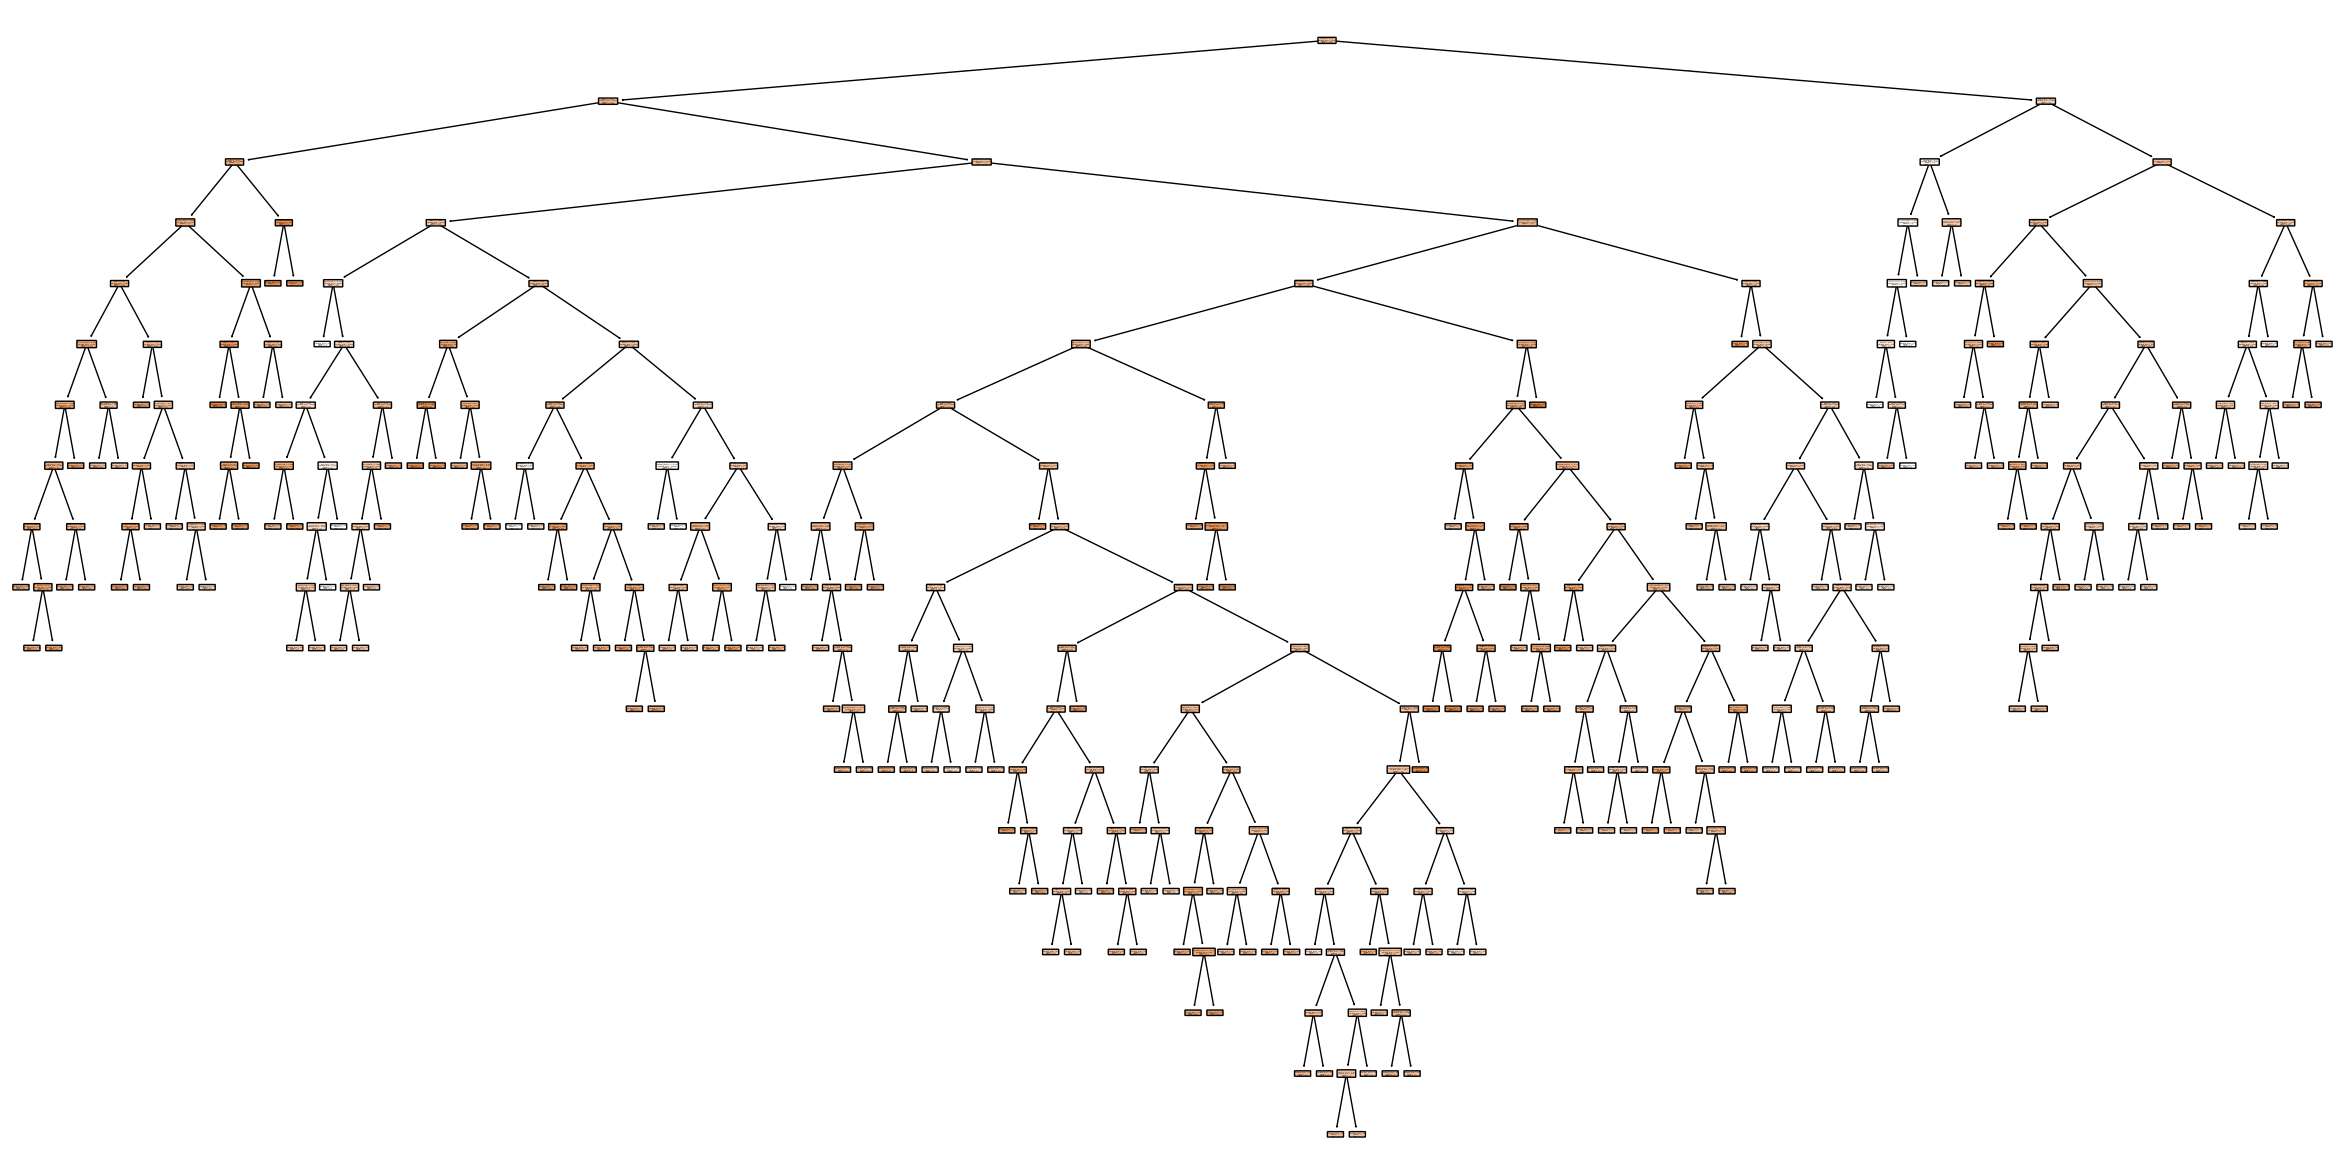

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 15))   # increase if needed
plot_tree(
    dt_full,
    feature_names=X.columns,
    filled=True,
    rounded=True
)
plt.show()

In [10]:
plt.figure(figsize=(50, 25))  # Big canvas
plot_tree(
    dt_full,
    feature_names=X.columns,
    filled=True,
    rounded=True
)
plt.savefig("decision_tree_full.pdf", dpi=300, bbox_inches="tight")
plt.close()

print("Saved as decision_tree_full.pdf — open it and zoom in for clear view.")

Saved as decision_tree_full.pdf — open it and zoom in for clear view.



--- Random Forest Performance ---
MAE: 3.1151890756302523
RMSE: 3.9537040990621914
R2 Score: 0.28888495093370137


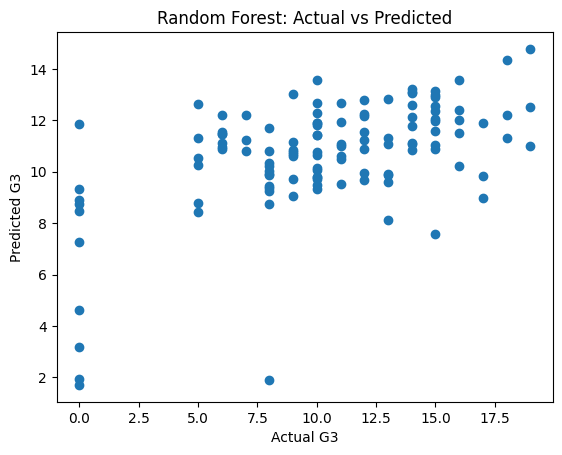

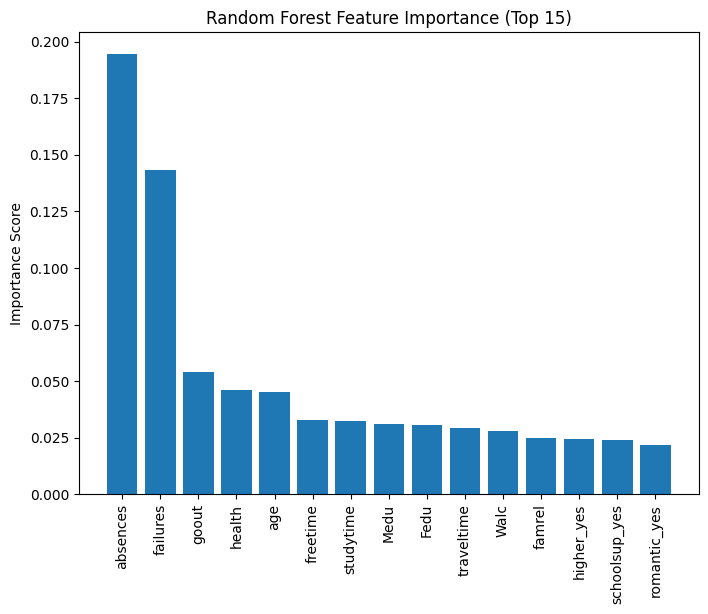

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

rf = RandomForestRegressor(
    n_estimators=400,
    random_state=42
)
rf.fit(X_train, y_train)  # NOTICE: Random Forest does NOT need scaled data

y_pred_rf = rf.predict(X_test)

print("\n--- Random Forest Performance ---")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

# Visualize Actual vs Predicted
plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

# Feature Importances
importances = rf.feature_importances_
idx = np.argsort(importances)[::-1][:15]

plt.figure(figsize=(8,6))
plt.bar(range(len(idx)), importances[idx])
plt.xticks(range(len(idx)), [X.columns[i] for i in idx], rotation=90)
plt.title("Random Forest Feature Importance (Top 15)")
plt.ylabel("Importance Score")
plt.show()



--- Gradient Boosting Performance ---
MAE: 3.279474759819593
RMSE: 4.136786455328531
R2 Score: 0.22150155538167338


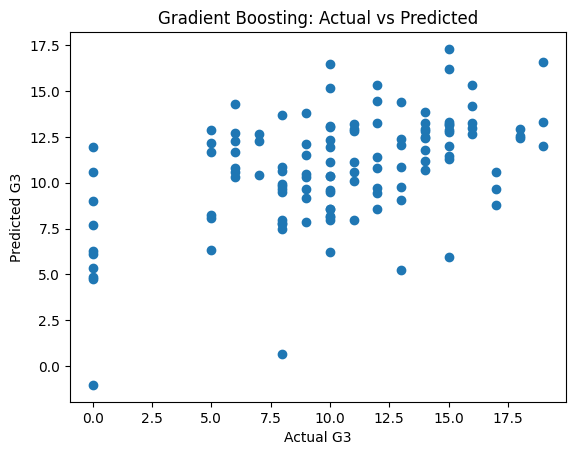

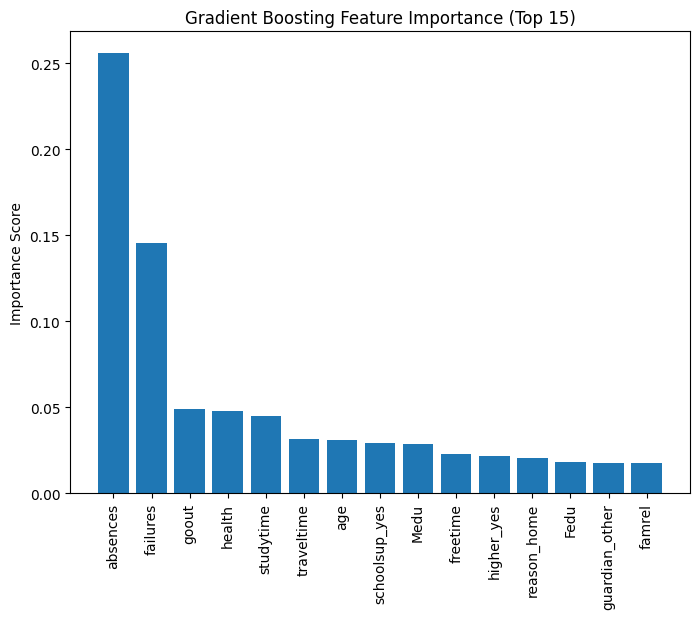

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("\n--- Gradient Boosting Performance ---")
print("MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))
print("R2 Score:", r2_score(y_test, y_pred_gbr))

# Visualize Actual vs Predicted
plt.figure()
plt.scatter(y_test, y_pred_gbr)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.show()

# Feature Importances
gbr_importances = gbr.feature_importances_
idx = np.argsort(gbr_importances)[::-1][:15]

plt.figure(figsize=(8,6))
plt.bar(range(len(idx)), gbr_importances[idx])
plt.xticks(range(len(idx)), [X.columns[i] for i in idx], rotation=90)
plt.title("Gradient Boosting Feature Importance (Top 15)")
plt.ylabel("Importance Score")
plt.show()


--- XGBoost Performance ---
MAE: 3.2881104946136475
RMSE: 4.133381276211539
R2 Score: 0.22278279066085815


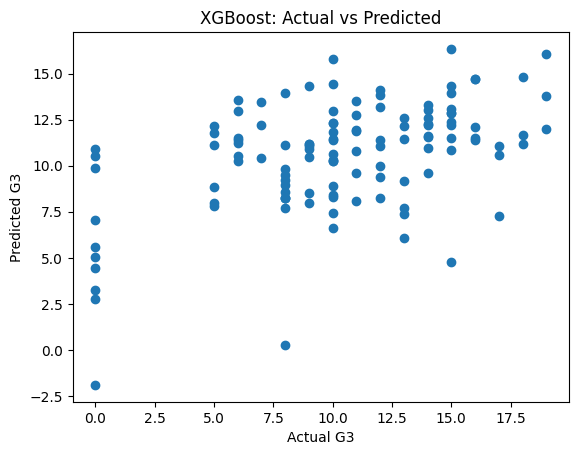

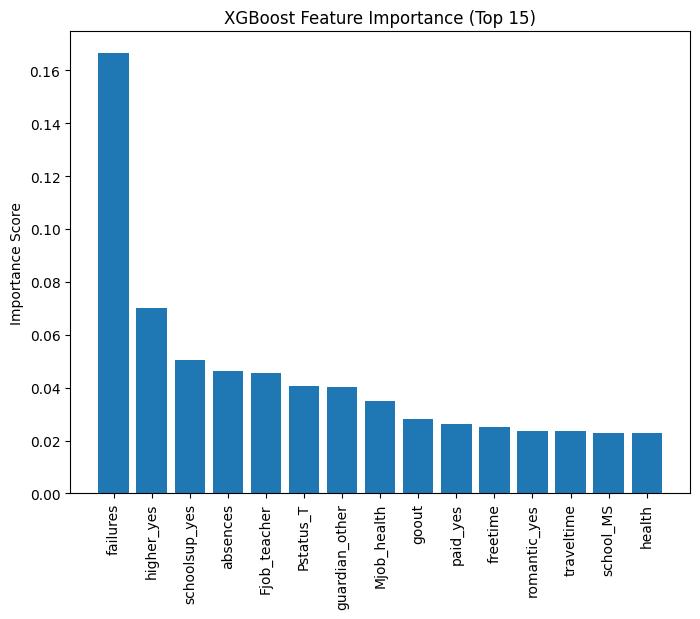

In [18]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=700,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\n--- XGBoost Performance ---")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2 Score:", r2_score(y_test, y_pred_xgb))

# Actual vs Predicted
plt.figure()
plt.scatter(y_test, y_pred_xgb)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("XGBoost: Actual vs Predicted")
plt.show()

# Feature Importances
xgb_importances = xgb.feature_importances_
idx = np.argsort(xgb_importances)[::-1][:15]

plt.figure(figsize=(8,6))
plt.bar(range(len(idx)), xgb_importances[idx])
plt.xticks(range(len(idx)), [X.columns[i] for i in idx], rotation=90)
plt.title("XGBoost Feature Importance (Top 15)")
plt.ylabel("Importance Score")
plt.show()


In [19]:
from sklearn.model_selection import cross_val_score, KFold

# 5-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_cv(model, X, y, model_name):
    scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    print(f"\n{model_name} Cross-Validation R² Scores: {scores}")
    print(f"Mean R²: {scores.mean():.4f} | Std: {scores.std():.4f}")


In [20]:
evaluate_cv(lr, X_train_scaled, y_train, "Linear Regression")


Linear Regression Cross-Validation R² Scores: [ 0.1158296  -0.11098112  0.07817493  0.09495151 -0.25807297]
Mean R²: -0.0160 | Std: 0.1457


In [22]:
evaluate_cv(dt_full, X_train_scaled, y_train, "Decision Tree")


Decision Tree Cross-Validation R² Scores: [-0.44571865 -0.65338524 -0.30719329 -0.62949551 -0.14172712]
Mean R²: -0.4355 | Std: 0.1939


In [23]:
evaluate_cv(rf, X_train, y_train, "Random Forest")


Random Forest Cross-Validation R² Scores: [0.16366831 0.16149184 0.30117193 0.31673691 0.14174613]
Mean R²: 0.2170 | Std: 0.0757


In [24]:
evaluate_cv(gbr, X_train, y_train, "Gradient Boosting")


Gradient Boosting Cross-Validation R² Scores: [ 0.26349758 -0.26688824  0.25426373  0.15669145 -0.03686449]
Mean R²: 0.0741 | Std: 0.2019


In [25]:
evaluate_cv(xgb, X_train, y_train, "XGBoost")


XGBoost Cross-Validation R² Scores: [ 0.21600378 -0.05042231  0.25782669  0.24709964 -0.05217528]
Mean R²: 0.1237 | Std: 0.1435


In [41]:
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"],
    "R2 Test": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gbr),
        r2_score(y_test, y_pred_xgb)
    ],
    "RMSE Test": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_gbr)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    ],
    "MAE Test": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_gbr),
        mean_absolute_error(y_test, y_pred_xgb)
    ]
}

results_df = pd.DataFrame(results)
print("\n\n=== Model Performance Comparison ===")
print(results_df)




=== Model Performance Comparison ===
               Model   R2 Test  RMSE Test  MAE Test
0  Linear Regression  0.211357   2.953121  2.235278
1      Decision Tree -0.249817   3.717614  2.698178
2      Random Forest  0.269290   2.842586  2.121936
3  Gradient Boosting  0.197834   2.978333  2.289952
4            XGBoost  0.266241   2.848510  2.163820


## With G1 and G2

In [48]:
# === Student Performance: All Features -> Predict G3 (CV Comparison) ===
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

try:
    from xgboost import XGBRegressor
    HAS_XGB = True
except Exception:
    HAS_XGB = False

# Load data  (Portuguese set)

df = pd.read_csv("student-por.csv", sep=";")

# Target and features
target = "G3"
y = df[target]
X = df.drop(columns=[target])

# Column types
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

#  Preprocessing
#    - OneHot for categoricals
#    - Scale numerics (with_mean=False to work with sparse design)

numeric_tf = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=False))
])

categorical_tf = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols),
    ],
    remainder="drop"
)


# Models to compare

models = {
    "Linear Regression": LinearRegression(),
    # Full depth Decision Tree (no max_depth)
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(
        n_estimators=400, random_state=42, n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

if HAS_XGB:
    models["XGBoost"] = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1
    )

# Cross-validation setup

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Built-in scorers: use the negative versions and flip the sign afterward
scoring = {
    "r2": "r2",
    "rmse": "neg_root_mean_squared_error",
    "mae": "neg_mean_absolute_error"
}

# Run CV for each model

rows = []
for name, model in models.items():
    pipe = Pipeline(steps=[
        ("prep", preprocess),
        ("model", model)
    ])
    cv_results = cross_validate(
        pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False
    )

    r2_mean  = np.mean(cv_results["test_r2"])
    rmse_mean = -np.mean(cv_results["test_rmse"])  # flip sign back
    mae_mean  = -np.mean(cv_results["test_mae"])   # flip sign back

    rows.append({
        "Model": name,
        "R2 CV": r2_mean,
        "RMSE CV": rmse_mean,
        "MAE CV": mae_mean
    })

results = pd.DataFrame(rows).sort_values("R2 CV", ascending=False).reset_index(drop=True)

print("=== Model Performance Comparison (5-fold CV) ===")
print(results.to_string(index=False))


=== Model Performance Comparison (5-fold CV) ===
            Model    R2 CV  RMSE CV   MAE CV
    Random Forest 0.843226 1.267536 0.823688
Linear Regression 0.836264 1.296538 0.843733
          XGBoost 0.834640 1.296593 0.833690
Gradient Boosting 0.831899 1.309955 0.838692
    Decision Tree 0.691374 1.773346 1.018187


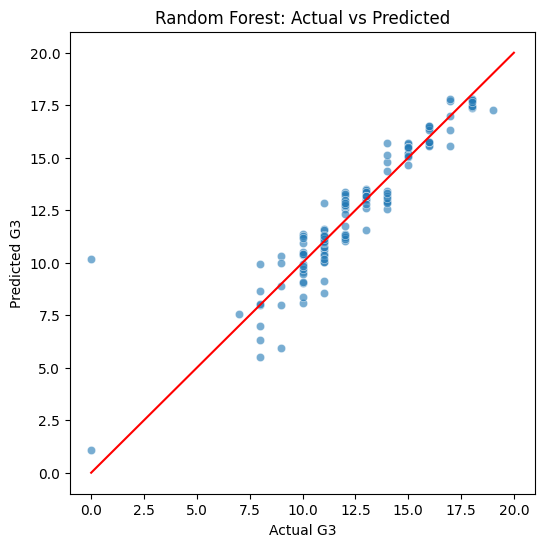

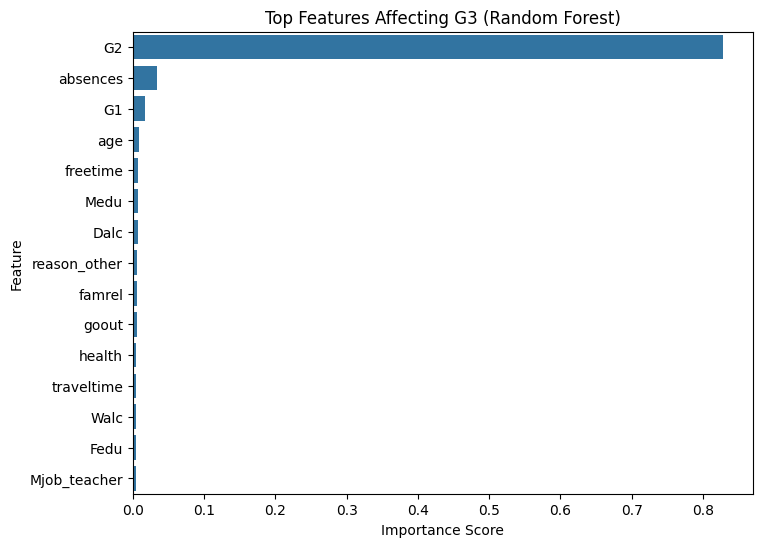

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("student-por.csv", sep=";")
target = "G3"
y = df[target]
X = df.drop(columns=[target])

cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(with_mean=False), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

rf = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1)

model = Pipeline(steps=[
    ("prep", preprocess),
    ("rf", rf)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([0,20], [0,20], color="red")
plt.show()

feature_names = (
    num_cols +
    list(model.named_steps["prep"]
         .transformers_[1][1]
         .get_feature_names_out(cat_cols))
)

importances = model.named_steps["rf"].feature_importances_

feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp, x="Importance", y="Feature")
plt.title("Top Features Affecting G3 (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
